In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

## Warmup Exercise

In [3]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

##  Linear Regression from scratch
####  Plotting the data

In [8]:
data= pd.read_csv("C://Users/Saba Naseem/Desktop/Machine Learning/Machine Learning/week2/Linear Regression with multivariable/machine-learning-ex1/ex1/ex1data1.txt", names= ['population', 'profit'])

In [5]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


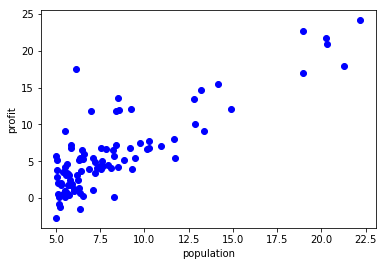

In [9]:
plt.scatter(data.population, data.profit, color='blue')
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

#### Gradient Descent

In [10]:
xdata= pd.DataFrame()

In [11]:
xdata['intercept']=1
xdata['population']= data['population']
xdata['intercept']=1

In [12]:
x= np.array(xdata)
y=np.array(data['profit'])

In [13]:
iterations = 1500
alpha = 0.01
theta = np.array([0, 0])

In [14]:
def cost_func(x, y, theta):
    m= len(y)
    cost= np.sum((x.dot(theta)-y)**2)/2/m
    return cost

In [15]:
cost_func(x,y,theta)

32.072733877455676

In [16]:
def gradient_descent(x, y, theta, iterations, alpha):
    
    m= len(y)
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = x.dot(theta)

        loss = hypothesis-y
        gradient = x.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_func(x, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history


In [17]:
gradient= gradient_descent(x,y,theta,iterations,alpha)

In [18]:
gradient[0]

array([-3.63029144,  1.16636235])

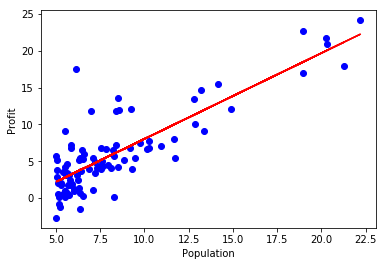

In [19]:
plt.scatter(data.population, data.profit, color='blue')
plt.plot(data.population, data.population*gradient[0][1] + gradient[0][0], '-r')
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

In [70]:
xx= np.asarray(data[['population']])
yy=np.asarray(data[['profit']])

## Linear Regression using SciKit learn


In [71]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [88]:
xtrain, xtest, ytrain, ytest= train_test_split(xx, yy, test_size=0.3, random_state=4)

In [89]:
lrmodel= linear_model.LinearRegression()

In [90]:
lrmodel.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
print("Coef: ", lrmodel.coef_, " Intercept: ", lrmodel.intercept_ )

Coef:  [[1.15955362]]  Intercept:  [-3.58801897]


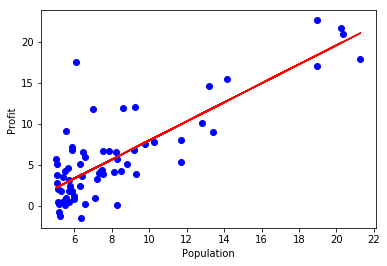

In [92]:
plt.scatter(xtrain, ytrain, color='blue')
plt.plot(xtrain, xtrain*lrmodel.coef_[0][0] + lrmodel.intercept_, '-r')
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

#### Prediction on unseen data

In [93]:
prediction=lrmodel.predict(xtest)

In [94]:
print("Error by R2_Score: %.2f " % r2_score(prediction, ytest))

Error by R2_Score: 0.65 


In [95]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - ytest)))

Mean absolute error: 1.76


In [96]:
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - ytest) ** 2))

Residual sum of squares (MSE): 5.77


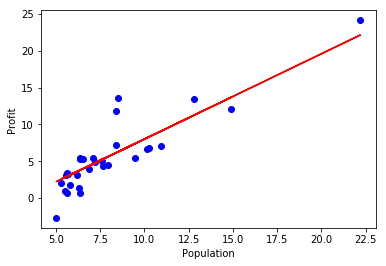

In [97]:
plt.scatter(xtest, ytest, color='blue')
plt.plot(xtest, xtest*lrmodel.coef_[0][0] + lrmodel.intercept_, '-r')
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()